In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wholesale_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
data = df.iloc[:,2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:
from sklearn.cluster import KMeans

WCSS
 [157595857165.60913, 113217528520.90994, 80342166920.94073, 64855545528.211044, 53091562444.79455, 47522021301.11336, 41570733554.23985, 36179278598.30544, 32807611714.07521, 30146950101.374893, 28553398878.031082, 26081101097.575714, 24379405676.641685, 22999664648.66954, 21063526176.73295, 20073302370.01674]


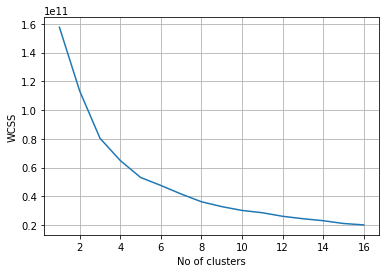

In [9]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,17): # i = no of clusters,
    m = KMeans(n_clusters=i)
    m.fit(data)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,17)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Applying KMeans at K=5

In [10]:
k5 = KMeans(n_clusters=5)
k5.fit(data)
ypred5 = k5.predict(data)
print(ypred5)

[3 3 3 2 2 3 3 3 3 0 0 3 2 2 2 3 0 3 2 3 2 3 2 0 2 2 3 2 0 1 2 3 2 2 3 3 2
 0 0 1 2 2 0 0 3 0 0 4 3 0 3 3 1 0 2 3 0 0 2 3 3 4 3 0 3 4 3 2 3 3 2 2 3 2
 3 2 3 0 3 3 3 0 3 2 3 4 4 1 3 2 3 2 0 2 0 3 3 3 3 3 0 0 3 1 2 2 3 0 3 0 3
 0 2 2 2 3 3 3 2 3 2 3 3 3 1 1 2 2 3 1 3 3 2 3 3 3 3 3 2 3 2 2 1 3 2 0 3 3
 3 2 2 3 2 3 3 0 0 2 3 0 3 3 2 0 3 0 3 3 3 3 0 0 3 0 3 0 1 3 3 3 3 1 0 1 3
 3 3 3 0 0 2 2 3 0 3 2 2 3 3 3 0 0 2 3 3 0 3 3 3 0 2 4 3 3 3 0 0 2 0 3 2 3
 3 3 3 3 2 3 3 3 3 3 2 3 2 3 3 2 3 1 2 2 2 3 3 0 3 2 2 3 3 0 3 2 3 2 3 3 1
 1 3 3 2 3 0 0 0 2 0 2 3 3 3 1 3 3 2 3 3 2 3 3 1 2 1 1 3 2 2 1 3 3 3 0 2 3
 2 3 3 3 2 0 3 0 0 0 0 2 3 0 3 2 0 3 3 0 3 3 3 0 3 3 2 2 2 1 3 3 2 3 3 0 2
 4 2 2 2 3 3 3 3 3 3 0 3 3 0 2 3 0 3 0 3 0 2 3 2 0 3 3 2 3 3 3 3 3 3 3 2 3
 1 2 3 2 3 3 0 1 3 3 2 2 1 3 0 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 2 3 2
 0 3 3 3 3 3 3 3 3 0 3 0 3 0 2 2 2 2 3 0 1 3 3 0 3 2 3 2 2 1 0 3 3]


In [11]:
df['Cls5'] = ypred5
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cls5
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2


In [12]:
df['Cls5'].value_counts()

3    219
2    110
0     78
1     26
4      7
Name: Cls5, dtype: int64

In [14]:
r = data.mean()
r

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [17]:
r.index

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [20]:
res = pd.DataFrame(r,columns=['Mean'])
res

,Mean
Fresh,12000.297727
Milk,5796.265909
Grocery,7951.277273
Frozen,3071.931818
Detergents_Paper,2881.493182
Delicassen,1524.870455


In [24]:
type(res)

pandas.core.frame.DataFrame

In [23]:
res1 = df.iloc[:,2:].groupby(['Cls5']).mean().T
res1

Cls5,0,1,2,3,4
Fresh,5076.653846,47543.192308,20429.072727,5756.219178,20031.285714
Milk,12288.525641,7026.884615,3575.881818,3421.086758,38084.000000
Grocery,18814.525641,6255.576923,4988.881818,4231.616438,56126.142857
Frozen,1605.000000,9412.653846,3920.209091,2431.762557,2564.571429
Detergents_Paper,8254.397436,943.115385,1082.272727,1310.187215,27644.571429
Delicassen,1830.512821,4250.153846,1640.409091,1001.721461,2548.142857


In [26]:
res1.columns

Index([0, 1, 2, 3, 4, 'Mean'], dtype='object', name='Cls5')

In [29]:
res1['Mean'] = res['Mean']
res1 = res1[['Mean',0,1,2,3,4]]
res1

Cls5,Mean,0,1,2,3,4
Fresh,12000.297727,5076.653846,47543.192308,20429.072727,5756.219178,20031.285714
Milk,5796.265909,12288.525641,7026.884615,3575.881818,3421.086758,38084.000000
Grocery,7951.277273,18814.525641,6255.576923,4988.881818,4231.616438,56126.142857
Frozen,3071.931818,1605.000000,9412.653846,3920.209091,2431.762557,2564.571429
Detergents_Paper,2881.493182,8254.397436,943.115385,1082.272727,1310.187215,27644.571429
Delicassen,1524.870455,1830.512821,4250.153846,1640.409091,1001.721461,2548.142857


In [ ]:
# Puma Shoes 
# Avg_Expense = 2500
# C1  =  2300
# C2  =  4500
# C3  =  1200